<a href="https://colab.research.google.com/github/Sahil-Jagadale/ML_PRACTICALS/blob/main/Problem_Statement_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("pima-indians-diabetes.csv")
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
columns = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome"
]

In [4]:
data.columns = columns

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
x = data.drop(columns=['Outcome'],axis=1)
y = data['Outcome']
x = pd.get_dummies(x)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [21]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred = model.predict(x_test)

In [23]:
accuracy = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report")
print(cr)

Accuracy: 0.7467532467532467
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       107
           1       0.58      0.64      0.61        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154



In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label_encoder = LabelEncoder()

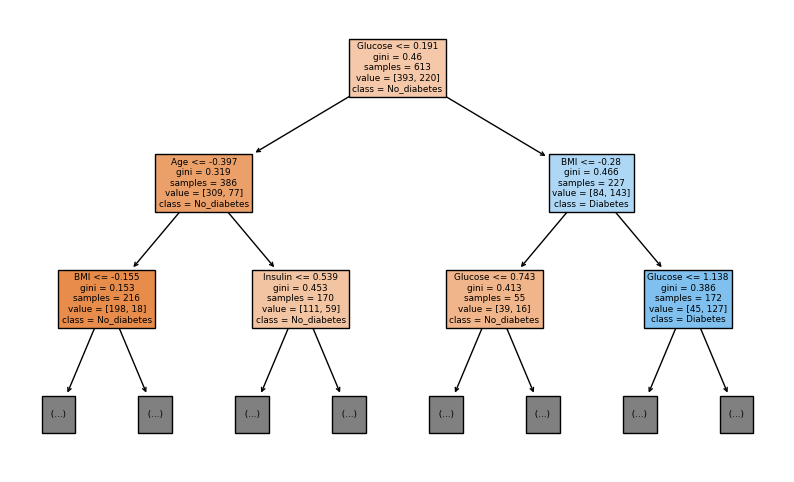

In [33]:
plt.figure(figsize=(10,6))
plot_tree(model,filled=True,feature_names=x.columns,class_names=['No_diabetes','Diabetes'],max_depth=2)
plt.show()